 # Анализ рынка общественного питания Москвы: определение перспективной ниши и локации

- Автор: Майорова Алина Евгеньевна
- Дата: 21.10.2025

### Цели и задачи проекта

**Основная цель** данного проекта заключается в комплексном анализе рынка общественного питания Москвы на основе данных сервисов Яндекс Карты и Яндекс Бизнес для выявления наиболее перспективных направлений открытия нового заведения.

**В рамках поставленной задачи необходимо выполнить полный цикл аналитического исследования:** начиная с загрузки и предобработки данных, включая проверку на корректность, пропуски и дубликаты, заканчивая детальным исследовательским анализом для определения оптимального формата заведения, его локации, ценовой политики и целевой аудитории, что в конечном итоге позволит сформировать обоснованные рекомендации для минимизации инвестиционных рисков и успешного запуска проекта.

### Описание данных

В проекте будут использованы данные из файла `/datasets/rest_info.csv`, в котором содержится информация о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- seats — количество посадочных мест.

И из файла `/datasets/rest_price.csv`, содержащего информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта
1. Загрузка данных и знакомство с ними
2. Предобработка данных:
- Типы данных
- Наличие пропусков в данных
- Явные и неявные дубликаты в данных
- Создание новых столбцов
3. Исследовательский анализ данных
- Анализ категорий заведений
- Географическое распределение
- Сетевые и несетевые заведения
- Анализ посадочных мест
- Исследование рейтингов
- Корреляционный анализ
- Анализ популярных сетей
- Исследование ценовой политики
4. Итоговые выводы

## 1. Загрузка данных и знакомство с ними

Установим специальную библиотеку для работы с корреляцией и загрузим все необходимые библиотеки для анализа данных `/datasets/rest_info.csv` и `/datasets/rest_price.csv`. 

In [1]:
!pip install phik

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем библиотеку для создания легенды
import matplotlib.patches as mpatches

In [3]:
# Выгружаем данные в переменные `rest_info` и `rest_prices`
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_prices = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с информацией из датафрейма `/datasets/rest_info.csv`. Затем выведем первые строки и результат метода `info()`.

In [4]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Выводим первые строки датафрейма
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


### Промежуточный вывод
**Общая характеристика данных:** данные датафрейма `/datasets/rest_info.csv` представлены в 9 столбцах и 8406 строках, в которых представлена общая информация о заведениях общественного питания.

**Ключевые наблюдения:**
- В основном все типы данных корректны, но можно оптимизировать данные в столбце `rating` до `float16`.
- Столбец `seats` необходимо перевести в тип данных `integer`.
- В столбце `chain` следует заменить тип данных на булевые значения `bool`.
- Столбец `category`, `district` для удобства анализа лучше перевести в тип `category`.
- Пропуски содержаться в столбцах `hours` - 536 значений и в `seats` - 3611 значений.
- Названий столбцов соответсвуют нормам.

Познакомимся с информацией из датафрейма `/datasets/rest_price.csv`. Затем выведем первые строки и результат метода `info()`.

In [6]:
# Выводим информацию о датафрейме
rest_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [7]:
# Выводим первые строки датафрейма
rest_prices.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


### Промежуточный вывод
**Общая характеристика данных:** данные датафрейма `/datasets/rest_price.csv` представлены в 5 столбцах и 4058 строках, в которых представлена информация о среднем чеке в заведениях общественного питания.

**Ключевые наблюдения:**

- Столбец `price` необходимо перевести в тип данных `category`.
- В столбцах `middle_avg_bill` и `middle_coffee_cup`можно понизить разрядность.
- Пропуски содержаться во всех столбцах кроме `id`, что требует тщательного изучения. Особенно крайне высокий процент пропусков наблюдается в столбце `middle_coffee_cup` - около 86%.
- Названий столбцов соответсвуют нормам.

**Другие особенности при изучении данных:**

Несоответствие размеров датафреймов:
- rest_info: 8406 записей
- rest_prices: 4058 записей

При объединении потеряется около 52% данных.

### Подготовка единого датафрейма

**Задача проекта предполагает комплексный анализ рынка общественного питания Москвы для выявления перспективных направлений инвестирования.** Поэтому необходимо соединить данные об основных характеристиках заведений из таблицы rest_info с информацией о ценовой политике и среднем чеке из таблицы rest_prices.

Каждая строка в этих датафреймах содержит информацию об одном заведении общественного питания, поэтому такие данные логично объединить в единый датафрейм, который позволит проводить многомерный анализ и выявлять комплексные закономерности. **Соединять данные будем по уникальному идентификатору заведения `id`**, который присутствует в обоих датафреймах.

При соединении **будем использовать левое объединение `how='left'`**, чтобы сохранить все заведения из основной таблицы rest_info. Такой подход обеспечит максимально полное представление о структуре рынка общественного питания Москвы. Данные о ценах и среднем чеке будут доступны только для части заведений (4058 из 8406), что составляет 48% от общего количества. Это ограничение будет учитываться при проведении анализа и формулировании выводов.

In [8]:
# Соединяем данные в единый датафрейм df
df=rest_info.merge(rest_prices, how='left', on='id')

In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных


### Оптимизируем типы данных.

Некорректные типы данных могут встречаться из-за наличия пропусков, текстовых значений вместо числовых, либо из-за автоматического приведения Pandas к float, чтобы поддерживать NaN. Также причиной может быть некорректное считывание исходного файла, когда все значения загружаются как строки.
Поэтому необходимо провести преобразования типов данных для корректного анализа.

In [10]:
# Преобразуем category и price к категориальному типу
df = df.astype({
    'category': 'category',
    'price': 'category',
    'district': 'category'
})

In [11]:
# Переведем chain в булевые значения
df['chain'] = df['chain'].astype('bool')

In [12]:
#Меняем разрядность в rating и middle_coffee_cup до float16, а middle_avg_bill до float32
df = df.astype({
    'rating': 'float16',
    'middle_avg_bill': 'float32',
    'middle_coffee_cup': 'float16'
})

In [13]:
# Проверяем типы данных
df.dtypes

id                     object
name                   object
category             category
address                object
district             category
hours                  object
rating                float16
chain                    bool
seats                 float64
price                category
avg_bill               object
middle_avg_bill       float32
middle_coffee_cup     float16
dtype: object

- На данном этапе мы преобразовали 3 столбца в тип `category`, 1 столбец в тип `bool` и уменьшили разрядность `float` в 3 столбцах.

- В `seats` мы оставили `float64`, что необходимо для корректного хранения пропущенных значений как NaN. Преобразование к целочисленному типу не производится, поскольку заполнение пропусков медианными значениями будет некорректным - это может исказить реальную картину рынка. Анализ количества посадочных мест будет проводиться только для заведений, у которых эти данные указаны.

### Наличие пропусков в данных

In [14]:
#Посчитаем количество пропусков в каждом столбце
absolute_nulls = df.isna().sum()
absolute_nulls

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
#Найдем долю пропусков
relative_nulls = (df.isna().sum() / len(df) * 100).round(2)
relative_nulls

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

Проведенный анализ выявил значительную вариативность в количестве пропущенных значений между различными столбцами датасета. Наиболее проблемными являются столбцы `middle_coffee_cup` (93.64% пропусков), `seats` (42.96% пропусков), `price` (60.56% пропусков) и `middle_avg_bill` (62.54% пропусков). 

**Обработка пропусков:**
1. `middle_coffee_cup` **будет удален** из датасета в связи с экстремально высоким процентом пропусков типа MNAR, что делает данный параметр нерелевантным для анализа большинства категорий заведений общественного питания.
2. Столбец `hours` содержит минимальный процент пропусков (6.38%), поэтому строки с отсутствующими значениями будут исключены из анализа.
3. В столбцах `seats`, `price`, `middle_avg_bill`, `avg_bill` - пропуски будут оставлены без заполнения, поскольку:

- Количество посадочных мест является индивидуальным параметром, зависящим от концепции заведения, бюджета и площади
- Средний чек и ценовая категория - субъективные бизнес-параметры, которые невозможно достоверно восстановить
- Заполнение медианными значениями исказило бы реальную картину рынка

**Такой подход обеспечивает достоверность результатов анализа, даже при неполноте исходных данных.** Все последующие исследования будут учитывать эти ограничения.

Удалим столбец с максимальным процентом пропусков

In [16]:
# Удаляем столбец middle_coffee_cup
df = df.drop('middle_coffee_cup', axis=1)

Удалим пропуски с минимальным процентом

In [17]:
# Удаляем строки с пропусками hours
df = df.dropna(subset= ['hours'])

In [18]:
# Проверяем корректность обработки пропусков
df.isna().sum()

id                    0
name                  0
category              0
address               0
district              0
hours                 0
rating                0
chain                 0
seats              3375
price              4560
avg_bill           4062
middle_avg_bill    4727
dtype: int64

In [19]:
# Проверяем размер исходного датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7870 entries, 0 to 8405
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               7870 non-null   object  
 1   name             7870 non-null   object  
 2   category         7870 non-null   category
 3   address          7870 non-null   object  
 4   district         7870 non-null   category
 5   hours            7870 non-null   object  
 6   rating           7870 non-null   float16 
 7   chain            7870 non-null   bool    
 8   seats            4495 non-null   float64 
 9   price            3310 non-null   category
 10  avg_bill         3808 non-null   object  
 11  middle_avg_bill  3143 non-null   float32 
dtypes: bool(1), category(3), float16(1), float32(1), float64(1), object(5)
memory usage: 508.2+ KB


**В результате мы очистили данные и подготовили их для дальнейших этапов анализа.**

### Явные и неявные дубликаты в данных

Перед поиском явных дубликатов необходимо провести анализ и нормализацию текстовых данных.

In [20]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

In [21]:
# Исследуем столбик name на неявные дубликаты
unique_name=df['name'].unique()
unique_name

array(['WoWфли', 'Четыре комнаты', 'Хазри', ..., 'Миславнес', 'Самовар',
       'Kebab Time'], dtype=object)

In [22]:
# Исследуем столбик address на неявные дубликаты
unique_address=df['address'].unique()
unique_address

array(['Москва, улица Дыбенко, 7/1', 'Москва, улица Дыбенко, 36, корп. 1',
       'Москва, Клязьминская улица, 15', ...,
       'Москва, улица Лобачевского, 52, корп. 1',
       'Москва, Болотниковская улица, 52, корп. 2',
       'Москва, Чонгарский бульвар, 26А, корп. 1'], dtype=object)

Проверим на неявные дубликаты столбцы с типом `category`

In [23]:
# Исследуем столбик district на неявные дубликаты
unique_district=df['district'].unique()
unique_district

['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ']
Categories (9, object): ['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', ..., 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ']

In [24]:
# Исследуем столбик category на неявные дубликаты
unique_category=df['category'].unique()
unique_category

['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
Categories (8, object): ['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']

In [25]:
# Исследуем столбик price на неявные дубликаты
unique_price=df['price'].unique()
unique_price

[NaN, 'выше среднего', 'средние', 'высокие', 'низкие']
Categories (4, object): ['выше среднего', 'средние', 'высокие', 'низкие']

**Категории не имеют дубликатов.**

Приведем названия заведений и их адреса к нижнему регистру, а также удалим лишние пробелы.

In [26]:
# Приведем названия заведений и их адреса к нижнему регистру, а также удалим лишние пробелы.
df['name'] =df['name'].str.lower().str.strip()  
df['address'] = df['address'].str.lower().str.strip()

После нормализации текстовых данных можно приступать к поиску явных дубликатов. Нормализация позволила устранить неявные дубликаты, вызванные разным написанием одних и тех же значений, что обеспечит более точное выявление настоящих дубликатов в данных при использовании метода `duplicated()`.

In [27]:
#Сортируем датафрейм по всем столбцам
df_sorted = df.sort_values(by=df.columns.tolist())

In [28]:
#Находим явные дубликаты
dublicates= df_sorted[df_sorted.duplicated(keep=False)]
dublicates

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill


In [29]:
#Считаем количество явных дубликатов в датафрейме
df.duplicated().sum()

0

**В результате проверки дубликаты не были обнаружены.**

### Создание новых столбцов

Для дальнейшего анализа создадим столбец `is_24_7`, который будет содержать информацию о круглосуточном режиме работы заведений. Этот столбец будет иметь логические значения: 
- логическое значение `True` — если заведение работает ежедневно и круглосуточно;
- логическое значение `False` — в противоположном случае.

In [30]:
# Создаем столбец is_24_7 с помощью цикла
df['is_24_7'] = False  # Инициализируем все значения как False

# Проходим по всем строкам через индекс DataFrame
for idx in df.index:
    # Получаем значение hours и преобразуем в строку
    hours_str = str(df.loc[idx, 'hours'])
    
    # Проверяем различные варианты написания круглосуточной работы
    if ('круглосуточно' in hours_str or 
        '24/7' in hours_str or 
        '24 часа' in hours_str or
        '0:00-24:00' in hours_str or
        '00:00-24:00' in hours_str):
        df.loc[idx, 'is_24_7'] = True

df['is_24_7']

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24_7, Length: 7870, dtype: bool

---

### Результаты предобработки

В ходе предобработки данных был проведен комплекс мероприятий по подготовке объединенного датасета к исследовательскому анализу:

1. Создан единый датафрейм путем левого объединения rest_info и rest_prices по идентификатору id, что позволило сохранить все 8406 заведений из основного датасета. Данные о ценах доступны для 4058 заведений (48% от общего количества), что будет учитываться при анализе ценовой политики.
2. Категориальные столбцы оптимизированы, а столбец `chain` конвертирован в булевый тип. Числовые столбцы оставлены в исходном формате для сохранения достоверности данных.
3. Пропущенные значения обработаны выборочно: удален столбец `middle_coffee_cup` с экстремально высоким процентом пропусков (93.64%), а также исключены строки с пропусками в hours (6.38%). Пропуски в ключевых числовых столбцах: `seats`, `price`, `middle_avg_bill`, `avg_bill` - оставлены без заполнения для сохранения достоверности анализа.

**Общий объем данных после предобработки составляет 7870 записей с 13 столбцами, что обеспечивает достаточную репрезентативность для анализа рынка общественного питания Москвы.**

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

**Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.**

Исследуем разнообразие форматов заведений общественного питания Москвы и проанализируем количественное распределение объектов по категориям. Для наглядного представления структуры рынка **построим столбчатую диаграмму**, которая позволит сравнить количество заведений каждого типа и выявить наиболее популярные форматы.

In [31]:
# Посчитаем количество уникальных заведений по категориям
print('Распределение заведений по категориям: ')
df.groupby('category')['id'].nunique()

Распределение заведений по категориям: 


category
бар,паб             747
булочная            249
быстрое питание     570
кафе               2003
кофейня            1398
пиццерия            628
ресторан           1969
столовая            306
Name: id, dtype: int64

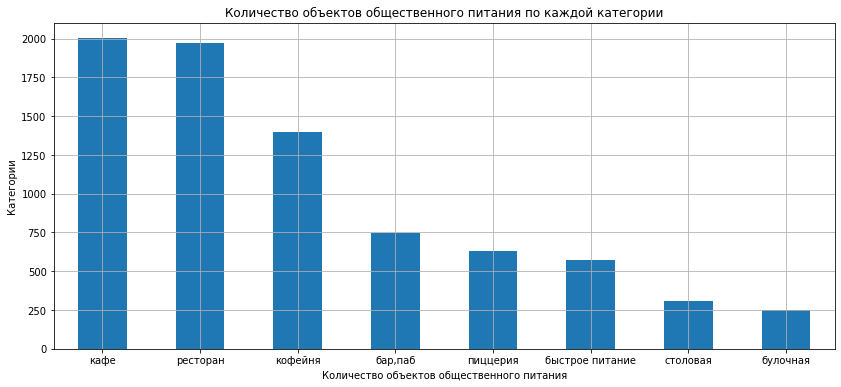

In [32]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, 
               legend=False, 
               title=f'Количество объектов общественного питания по каждой категории'
)

# Настраиваем оформление графика
plt.xlabel('Количество объектов общественного питания')
plt.ylabel('Категории')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В Москве **больше всего `кафе`, `ресторанов` и `кофеен`** — именно эти форматы доминируют на рынке общественного питания. При этом такие заведения как **`точки быстрого питания`, `столовые` и `булочные` встречаются значительно реже**, что может говорить о возможности новых проектов занять устойчивую позицию на рынке без необходимости конкурировать с большим количеством аналогичных заведений.

---

### Задача 2

**Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.**

Сначала исследуем распределение количества заведений по административным районам Москвы. Для наглядного представления структуры рынка **построим столбчатую диаграмму.**

In [33]:
# Исследуем административные районы Москвы
print('Распределение заведений по административным районам Москвы:')
df['district'].value_counts()

Распределение заведений по административным районам Москвы:


Центральный административный округ         2211
Северный административный округ             846
Северо-Восточный административный округ     830
Южный административный округ                827
Западный административный округ             785
Восточный административный округ            723
Юго-Западный административный округ         650
Юго-Восточный административный округ        629
Северо-Западный административный округ      369
Name: district, dtype: int64

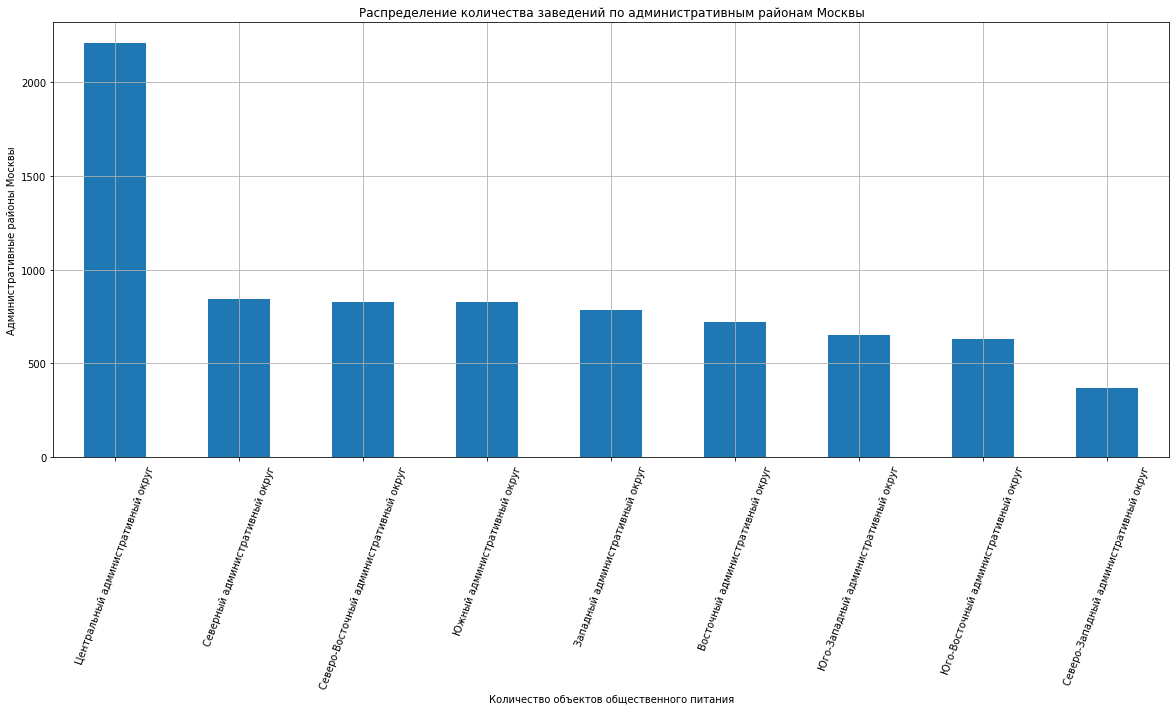

In [34]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=70, 
               legend=False, 
               title=f'Распределение количества заведений по административным районам Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Количество объектов общественного питания')
plt.ylabel('Административные районы Москвы')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Анализ распределения заведений по административным округам Москвы показывает, что **Центральный административный округ является безусловным лидером** по концентрации объектов общественного питания, что свидетельствует о его высокой привлекательности для бизнеса в этой сфере. При этом **Северо-Западный административный округ демонстрирует наименьшее количество заведений**, что может указывать на его недостаточную освоенность или меньшую популярность у предпринимателей.

Теперь посмотрим распределение заведений каждой категории в Центральном административном округе Москвы. 

In [35]:
# Фильтруем данные для ЦАО
cao_data = df[df['district'] == 'Центральный административный округ']

print('Распределение категорий заведений в Центральном административном округе:')
cao_data['category'].value_counts()

Распределение категорий заведений в Центральном административном округе:


ресторан           665
кафе               444
кофейня            426
бар,паб            364
пиццерия           112
быстрое питание     85
столовая            65
булочная            50
Name: category, dtype: int64

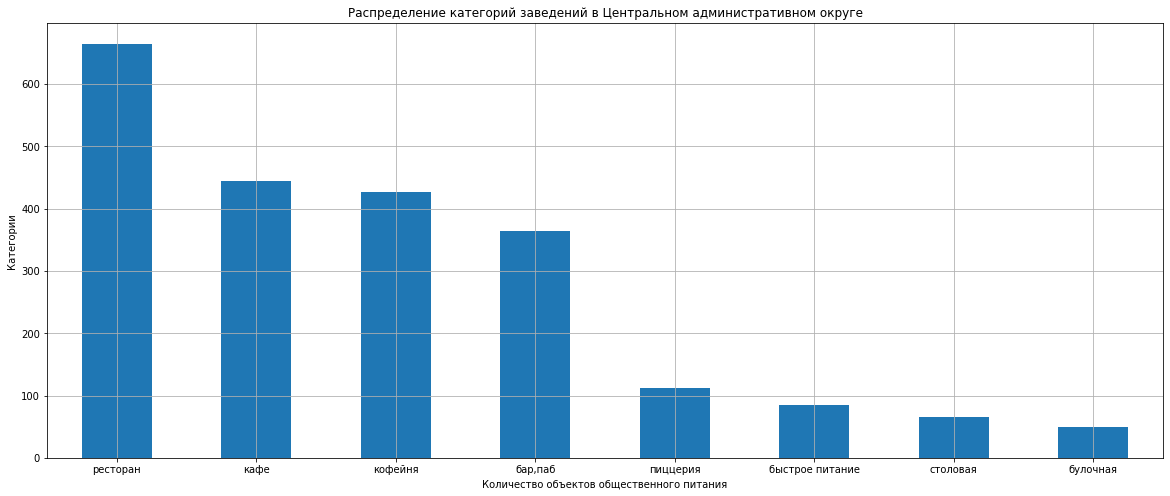

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
cao_data['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, 
               legend=False, 
               title=f'Распределение категорий заведений в Центральном административном округе'
)

# Настраиваем оформление графика
plt.xlabel('Количество объектов общественного питания')
plt.ylabel('Категории')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В Центральном административном округе **преобладают рестораны**, что свидетельствует о ориентации на премиальный сегмент рынка. Значительную долю также занимают кафе и кофейни.

---

### Задача 3

**Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.**

Чтобы понять, какая бизнес-модель более распространена на московском рынке общественного питания, начнем с анализа общего соотношения сетевых и несетевых заведений.

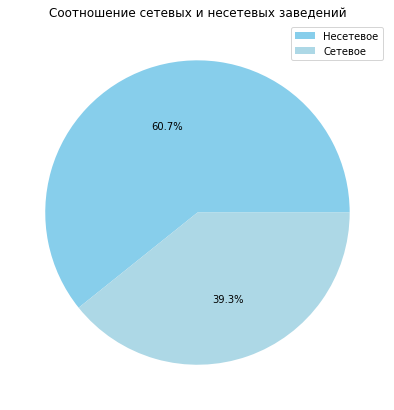

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 7))

# Строим круговую диаграмму с помощью pandas через plot(kind='pie')
df['chain'].value_counts().plot(
    kind='pie',
    rot=0,
    colors=['skyblue', 'lightblue'],
    autopct='%1.1f%%',
    legend=True,
    labels=None,
    title=f'Соотношение сетевых и несетевых заведений'
)

plt.legend(['Несетевое', 'Сетевое'])

# Настраиваем оформление
plt.xlabel('')
plt.ylabel('')
plt.grid()
plt.show()

Проведенный анализ показывает, что в Москве **преобладают несетевые заведения**, которые составляют `60,7%` от общего количества объектов общественного питания. Это свидетельствует о высокой доле малого и среднего бизнеса в данном сегменте, а также о разнообразии и уникальности предлагаемых форматов заведений.

Для принятия взвешенного инвестиционного решения недостаточно общих цифр. Ключевое значение имеет отраслевая специфика: в некоторых категориях сетевая модель может демонстрировать явные преимущества. Проанализируем распределение по основным сегментам рынка. Для этого используем метод `unstack()`.

In [38]:
# Найдём соотношение сетевых и несетевых заведений в разрезе категорий 
df.groupby('category')['chain'].value_counts().unstack()

chain,False,True
category,,
"бар,паб",588,159
булочная,95,154
быстрое питание,346,224
кафе,1292,711
кофейня,684,714
пиццерия,298,330
ресторан,1257,712
столовая,221,85


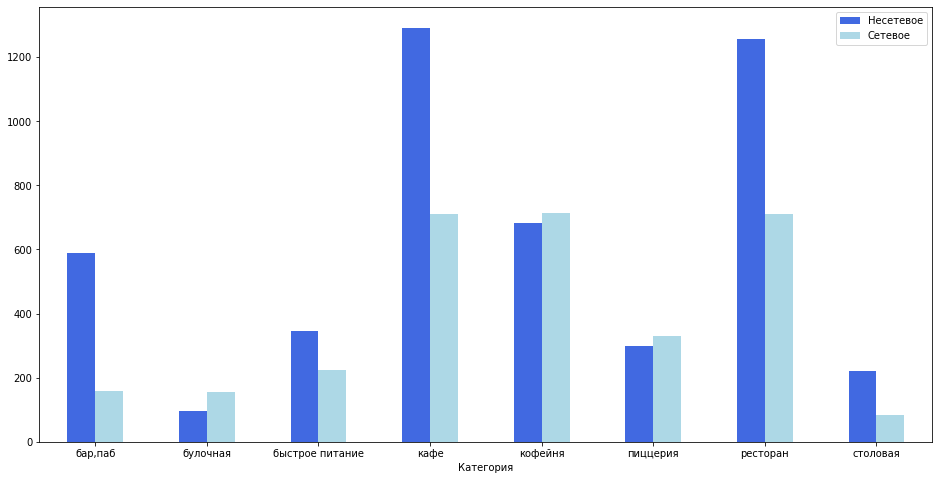

In [39]:
# Строим столбчатую диаграмму 
df.groupby('category')['chain'].value_counts().unstack().plot(figsize=(16, 8),
                kind='bar',
                rot=0,
                legend=True,
                color=['royalblue', 'lightblue']
)

plt.legend(['Несетевое', 'Сетевое'])

#Оформление графика
plt.xlabel('Категория')
plt.ylabel('')
plt.show()

В результате анализа мы видим, что `булочная` является лидером по доле сетевых заведений. Также демонстрируют склонность к сетевой модели такие заведения, как:
- пиццерии
- кофейни

**Булочные представляют собой наиболее конкурентный и развитый сегмент** с преобладанием сетевых игроков, что может указывать как на зрелость этого рынка, так и на эффективность сетевой модели именно в этом формате общественного питания.

---

### Задача 4

**Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.**


Сначала построим обычную диаграмму размаха для всего набора данных в `seats`. Это поможет понять, как данные распределены в целом, включая выбросы.

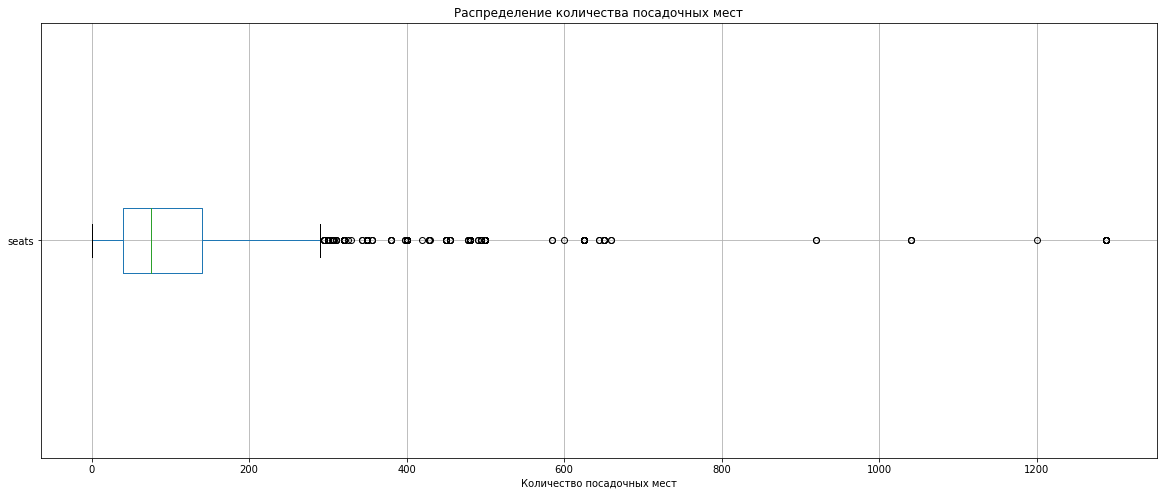

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 8))

# Строим диаграмму размаха значений в столбце seats
df.boxplot(column='seats', vert=False)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

plt.show()

**Первоначальный анализ выявил значительное количество выбросов в данных** о посадочных местах, которые визуально затрудняют оценку основных параметров распределения. Для более детального изучения типичных значений и межквартильных диапазонов построим диаграмму размаха без учета аномальных значений  с помощью `showfliers=False`.

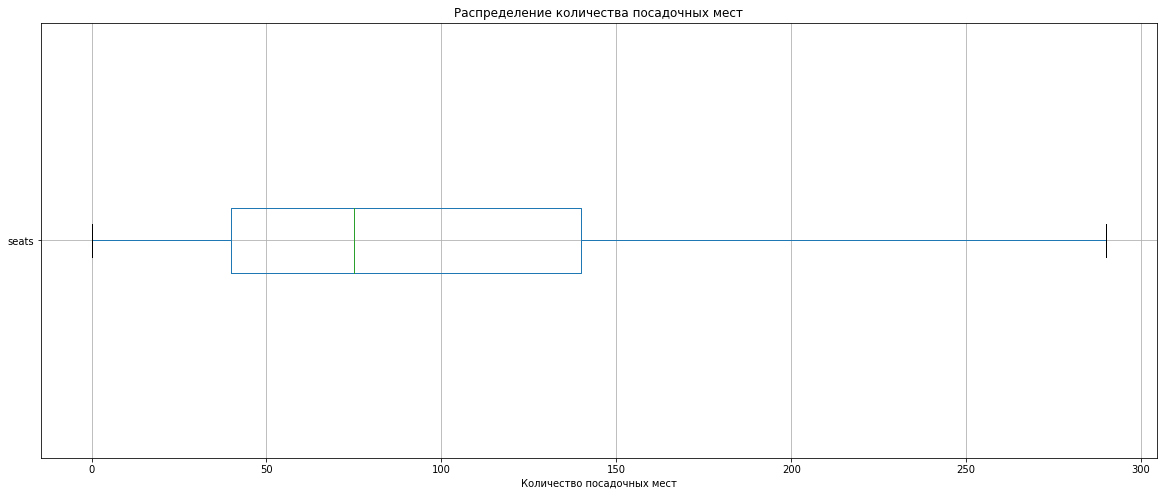

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 8))

# Строим диаграмму размаха значений в столбце seats
df.boxplot(column='seats', vert=False, showfliers=False)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

plt.show()

Для точного анализа также рассчитаем статистические показатели с помощью метода `describe`.

In [42]:
# Рассчитываем 99-й процентиль для выявления выбросов
outliers = df['seats'].quantile(0.99)

# Отбираем данные, оставляя значения меньше найденного порога выбросов
filtered_df = df.loc[df['seats'] < outliers]

# Выводим результат describe() после фильтрации данных
filtered_df['seats'].describe()

count    4449.000000
mean      100.712520
std        93.111786
min         0.000000
25%        40.000000
50%        72.000000
75%       130.000000
max       600.000000
Name: seats, dtype: float64

Анализ количества посадочных мест проведен на основе 4795 записей (57% от общего числа заведений), что обусловлено сохранением пропусков в данных для обеспечения достоверности результатов.

Статистический анализ демонстрирует выраженную левостороннюю асимметрию, что подтверждается сравнением среднего значения около `100.7 мест` и медианы `72 мест`. Медиана значительно меньше среднего значения, что указывает на смещение распределения в сторону меньших значений при наличии отдельных заведений с очень большим количеством посадочных мест.

**Типичный диапазон для большинства заведений составляет 40-130 мест** (50% центральных значений). Однако в данных **присутствуют выраженные аномалии** - максимальное значение 600 мест более чем в 4.5 раза превышает 75-й процентиль.

Высокое стандартное отклонение `93.1 места` подтверждает значительную вариативность данных. Наличие заведений с 0 посадочных мест может быть связано с форматами "навынос" или ошибками ввода данных, в то время как экстремально высокие значения могут соответствовать банкетным залам, столовым при крупных предприятиях или ресторанам в составе торгово-развлекательных комплексов.

Учитывая выявленные аномалии и высокую вариативность, для получения релевантных результатов необходим анализ типичной вместимости для каждой категории заведений отдельно, что позволит выявить отраслевые особенности и сформулировать более точные рекомендации.

In [43]:
# Расчёт статистических показателей по категориям 
category_stats = df.groupby('category')['seats'].describe()
category_stats

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",456.0,121.870614,135.347914,0.0,47.75,82.5,147.75,1288.0
булочная,146.0,90.054795,98.185804,0.0,25.00,50.0,120.00,625.0
быстрое питание,324.0,100.453704,108.691718,0.0,27.25,69.5,150.00,1040.0
кафе,1027.0,94.283350,109.119409,0.0,35.00,60.0,106.00,1288.0
кофейня,745.0,111.665772,128.225554,0.0,40.00,80.0,145.00,1288.0
пиццерия,423.0,94.621749,112.757630,0.0,30.00,55.0,120.00,1288.0
ресторан,1216.0,121.459704,119.604224,0.0,48.00,86.0,150.00,1288.0
столовая,158.0,99.740506,124.884261,0.0,40.00,73.5,115.00,1200.0


In [44]:
# Для более точного анализа исключим выбросы по каждой категории отдельно с помощью IQR
def filter_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group >= lower_bound) & (group <= upper_bound)]

filtered_by_category = df.groupby('category')['seats'].apply(filter_outliers)

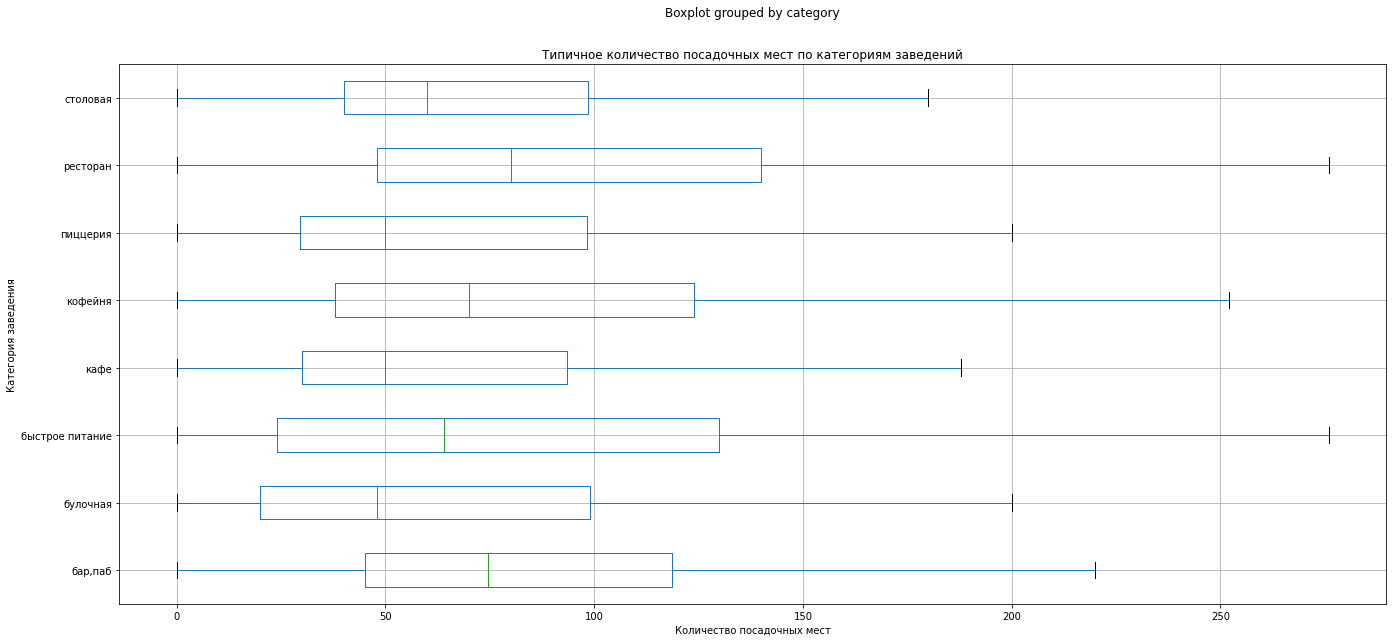

In [45]:
# Строим визуализацию диаграмму размаха
filtered_by_category.reset_index().boxplot(figsize=(22, 10),
                                           by='category', 
                                           column='seats', 
                                           vert=False, 
                                           showfliers=False)

plt.title('Типичное количество посадочных мест по категориям заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория заведения')

plt.show()

Для демонстрации использовалась диаграмма размаха без выбросов, которая наглядно показала типичные диапазоны вместимости для каждой категории. 

**Наиболее типичное количество посадочных мест по категориям заведений:**
- Рестораны - 86 мест 
- Бары, паб - 82 мест
- Булочные - 50 мест
- Кофейни - 80 мест
- Столовые - 73 мест
- Заведения быстрого питания - 70 мест
- Кафе - 60 мест 
- Пиццерии - 55 мест

**Промежуточный вывод:** 

Для старта с минимальными инвестициями в помещение наиболее подходят форматы с наименьшей типичной вместимостью: булочные (50 мест), пиццерии (55 мест) и кафе (60 мест). Эти форматы требуют наименьших площадей, что снижает затраты на аренду и обустройство.

Для проектов средней инвестиционной емкости оптимальны заведения быстрого питания (70 мест), столовые (73 места) и кофейни (80 мест), которые балансируют между доступными инвестициями и потенциальной доходностью.

Для масштабных проектов с расчетом на высокую проходимость стоит рассмотреть бары (82 места) и рестораны (86 мест), однако это потребует соответствующих инвестиций и операционных компетенций.

---

### Задача 5

**Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?**

Для понимания качества обслуживания и удовлетворенности клиентов в различных сегментах рынка общественного питания проведем анализ рейтингов заведений по категориям.

In [46]:
# Сортируем категории по среднему рейтингу по убыванию
mean_ratings = df.groupby('category')['rating'].mean().sort_values()
mean_ratings

category
быстрое питание    4.058594
кафе               4.148438
столовая           4.218750
кофейня            4.273438
булочная           4.277344
ресторан           4.296875
пиццерия           4.300781
бар,паб            4.394531
Name: rating, dtype: float16

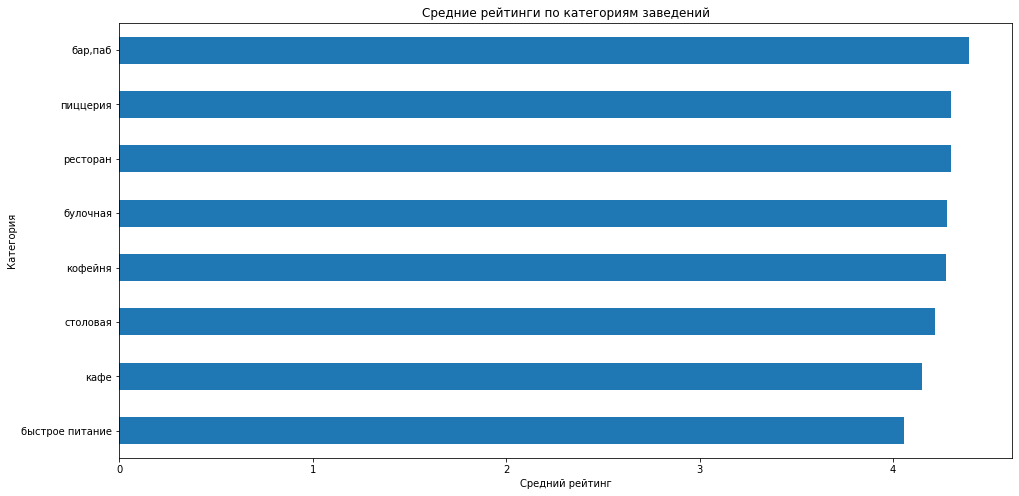

In [47]:
# Визуализируем распределение
mean_ratings.plot(figsize=(16, 8),
                  kind='barh',
                  rot=0,
                  legend=False
)

# Оформление графика
plt.title('Средние рейтинги по категориям заведений')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория')

plt.show()

Анализ рейтингов заведений показал, что все категории общественного питания Москвы получают высокие оценки - выше 4.0 баллов. **Наибольшей популярностью пользуются бары и пабы (4.39), а также пиццерии и рестораны (4.30).** При этом разница между максимальным и минимальным рейтингом составляет всего 0.33 балла.

Усреднённые рейтинги не сильно различаются между типами заведений. Это свидетельствует о том, что московский рынок общественного питания в целом удовлетворяет ожидания потребителей независимо от формата заведения, поэтому выбор категории для открытия нового заведения может основываться на других факторах.

---

### Задача 6

**Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.**

После изучения распределения средних рейтингов по категориям заведений логичным следующим шагом будет исследование факторов, влияющих на оценку пользователей. Проанализируем, с какими параметрами заведений рейтинги показывают наибольшую взаимосвязь.

In [48]:
# Создаем список числовых столбцов для корректного расчета Phi-K
numerical_columns = ['seats', 'rating'] 

# Вычисляем матрицу корреляции Phi-K
correlations_matrix = phik_matrix(
    df[['rating', 'chain', 'seats', 'is_24_7', 'category', 'district', 'price']], 
    interval_cols=numerical_columns
)
correlations_matrix

,rating,chain,seats,is_24_7,category,district,price
rating,1.000000,0.128024,0.000000,0.181928,0.188789,0.199449,0.263613
chain,0.128024,1.000000,0.052435,0.039474,0.265606,0.061162,0.219168
seats,0.000000,0.052435,1.000000,0.042759,0.058703,0.347267,0.065702
is_24_7,0.181928,0.039474,0.042759,1.000000,0.251430,0.080917,0.066339
category,0.188789,0.265606,0.058703,0.251430,1.000000,0.168063,0.567010
district,0.199449,0.061162,0.347267,0.080917,0.168063,1.000000,0.203689
price,0.263613,0.219168,0.065702,0.066339,0.567010,0.203689,1.000000


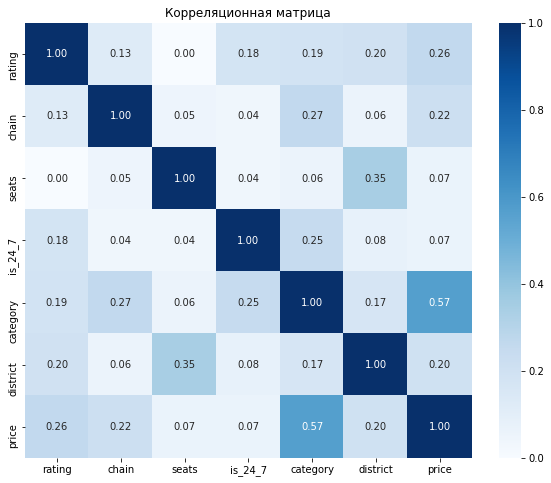

In [49]:
# Визуализируем корреляционную матрицу в виде тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlations_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='Blues')

plt.title('Корреляционная матрица')
plt.show()

Анализ выявил, что наиболее сильная корреляция наблюдается между рейтингом и ценовой категорией заведения - `0.26`. Но необходимо детально изучить, как именно распределяются средние рейтинги по разным ценовым сегментам.

In [50]:
# Усредняем рейтинги по ценовым сегментам
mean_ratings_price = df.groupby('price')['rating'].mean().sort_values(ascending=False)
mean_ratings_price

price
высокие          4.437500
выше среднего    4.386719
средние          4.296875
низкие           4.171875
Name: rating, dtype: float16

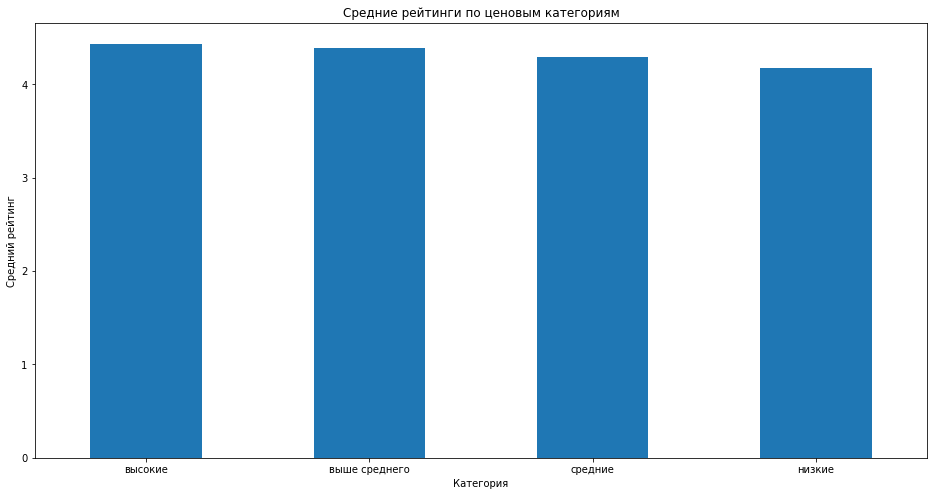

In [51]:
# Визуализируем распределние через столбчатую диаграмму
mean_ratings_price.plot(figsize=(16, 8),
                  kind='bar',
                  rot=0,
                  legend=False
)

# Оформление графика
plt.title('Средние рейтинги по ценовым категориям')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')

plt.show()

Проведенный анализ числовых данных полностью подтверждает выявленную корреляционную связь между рейтингом и ценовой категорией. Распределение средних оценок по ценовым сегментам свидетельствует о четкой закономерности: **более дорогие заведения получают в среднем более высокие оценки**. Данная тенденция может быть связана с повышенными ожиданиями клиентов от качества обслуживания и уровня сервиса в премиальных сегментах.

При этом важно обратить внимание, что совсем отсутствует связь между рейтингом и количеством посадочных мест. Это означает, что размер заведения и его вместимость не оказывают существенного влияния на оценки пользователей, **что свидетельствует о приоритете качества обслуживания над физическими параметрами заведения.**

---

### Задача 7

**Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.**

Для понимания текущей структуры рынка общественного питания Москвы проанализируем самые популярные сетевые заведения. Определим топ-15 сетей по количеству заведений и оценим их средние рейтинги, чтобы выявить не только самые распространенные, но и наиболее качественные форматы.

In [52]:
# Фильтруем только сетевые заведения
chain_restaurants = df[df['chain'] == 1]

# Группируем данные по названиям заведений для поиска сетей
# и считаем количество заведений в сети и средний рейтинг сети
chains_data = chain_restaurants.groupby('name').agg(  
    count=('name', 'count'),  
    avg_rating=('rating', 'mean')
).reset_index()

# Сортируем по количеству заведений и берем топ-15
top_15_chains = chains_data.sort_values('count', ascending=False).head(15)
top_15_chains

,name,count,avg_rating
715,шоколадница,120,4.179688
329,домино'с пицца,76,4.171875
325,додо пицца,74,4.285156
144,one price coffee,71,4.066406
728,яндекс лавка,68,3.871094
58,cofix,65,4.074219
166,prime,50,4.117188
401,кофепорт,42,4.148438
410,кулинарная лавка братьев караваевых,39,4.394531
651,хинкальная,39,4.375000


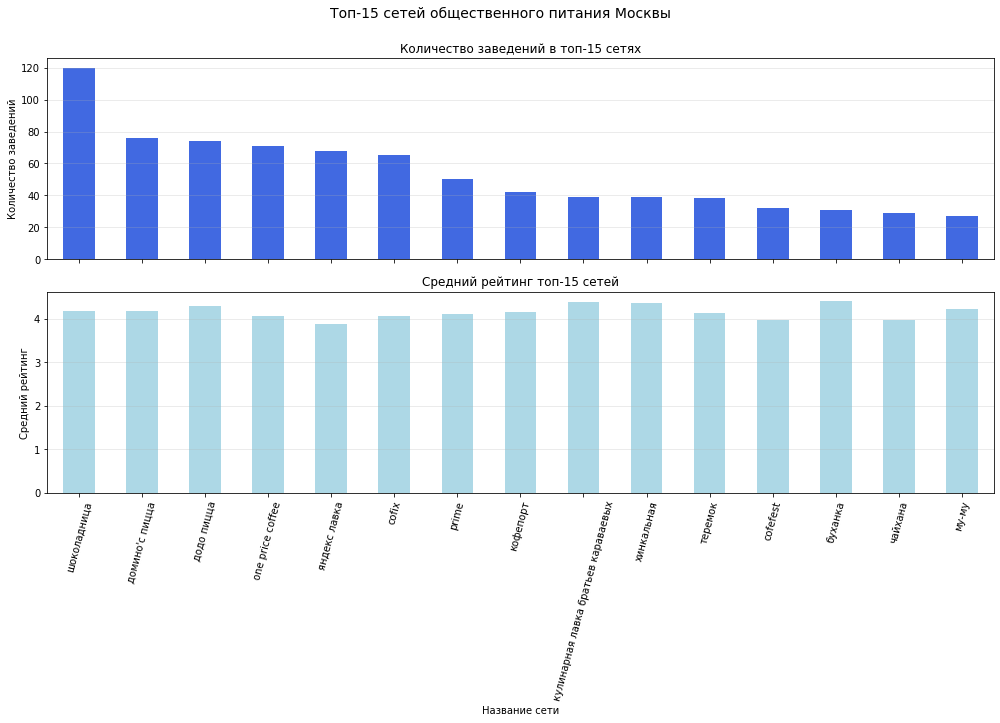

In [53]:
# Создаем датафрейм для подграфиков
df_for_subplots = top_15_chains.set_index('name')[['count', 'avg_rating']]

# Строим подграфики
axes = df_for_subplots.plot(figsize=(14, 10), kind='bar',
                           subplots=True,
                           sharex=True,
                           sharey=False,
                           legend=False,
                           color=['royalblue', 'lightblue'],
                           rot=75,
                           title=['Количество заведений в топ-15 сетях', 'Средний рейтинг топ-15 сетей'])

# Устанавливаем подписи для осей Y
axes[0].set_ylabel('Количество заведений')
axes[1].set_ylabel('Средний рейтинг')

# Устанавливаем общую подпись для оси X
axes[1].set_xlabel('Название сети')

# Включаем сетку для каждого подграфика
axes[0].grid(axis='y', alpha=0.3)
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Топ-15 сетей общественного питания Москвы', fontsize=14, y=1)

# Используем метод для более аккуратного расположения
plt.tight_layout()
plt.show()

Анализ выявил тройку лидеров среди сетевых заведений Москвы: 
- **«Шоколадница»** - 120 заведений
- **«Доминос Пицца»** - 76 заведений
- **«Додо Пицца»** - 74 заведения

Все крупнейшие сети демонстрируют стабильно высокие рейтинги в диапазоне от 4.17 до 4.29 баллов, что подтверждает хорошее качество обслуживания в популярных сетевых форматах.

Особого внимания заслуживают сети с наивысшими потребительскими оценками:
- **«Кулинарная лавка братьев Караваевых»** - 4.39 балла (39 заведений)
- **«Буханка»** - 4.40 балла (31 заведение)
- **«Хинкальная»** - 4.38 балла (39 заведений)

Можно предположить, что особой популярностью у москвичей пользуются заведения с национальной и зарубежной кухней, а также булочные. Это указывает на перспективность данных направлений для дальнейшего развития сетевых проектов.

Теперь определим, к каким конкретно категориям относятся эти популярные сети. Это поможет понять, какие форматы общественного питания наиболее успешно масштабируются в сетевом формате в Москве.

In [54]:
# Считаем общее количество заведений для каждой сети и сортируем
chain_counts = chain_restaurants.groupby('name').size().reset_index(name='count')
top_15_chains = chain_counts.sort_values('count', ascending=False).head(15)

# Для каждой сети из топ-15 находим самую частую категорию
result = []
for name in top_15_chains['name']:
    chain_data = chain_restaurants[chain_restaurants['name'] == name]
    main_category = chain_data['category'].value_counts().index[0]
    result.append({'name': name, 'count': top_15_chains[top_15_chains['name'] == name]['count'].iloc[0], 'category': main_category})

# Создаем финальный датафрейм
final_result = pd.DataFrame(result)
final_result

,name,count,category
0,шоколадница,120,кофейня
1,домино'с пицца,76,пиццерия
2,додо пицца,74,пиццерия
3,one price coffee,71,кофейня
4,яндекс лавка,68,ресторан
5,cofix,65,кофейня
6,prime,50,ресторан
7,кофепорт,42,кофейня
8,кулинарная лавка братьев караваевых,39,кафе
9,хинкальная,39,кафе


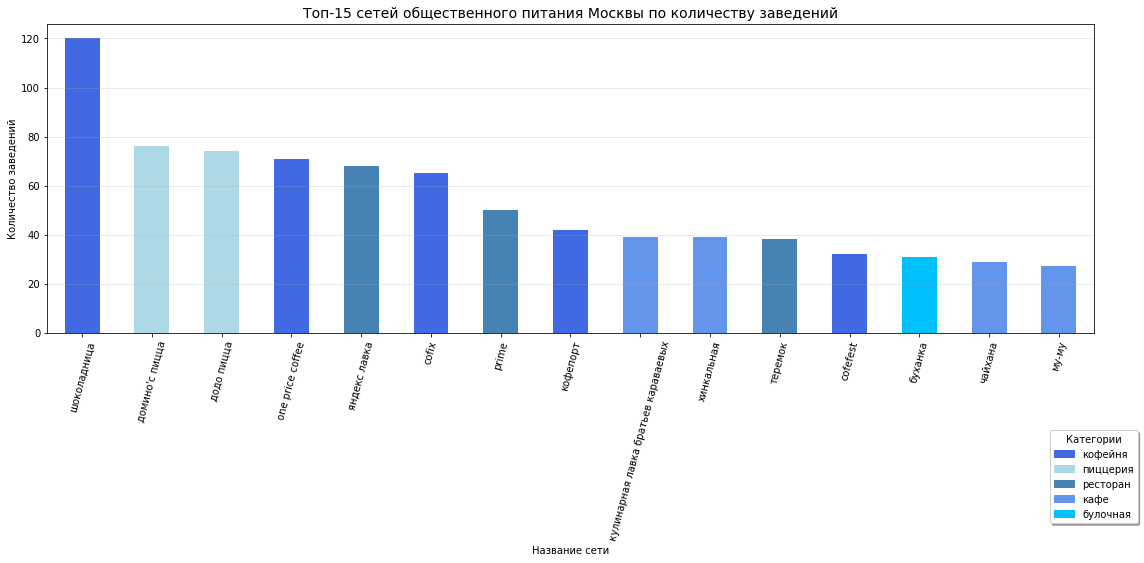

In [55]:
# Создаем словарь цветов для категорий
colors = ['royalblue', 'lightblue', 'steelblue', 'cornflowerblue', 'deepskyblue']
color_dict = {cat: colors[i % len(colors)] for i, cat in enumerate(final_result['category'].unique())}

# Создаем элементы для легенды
legend_elements = [mpatches.Patch(color=color_dict[cat], label=cat) 
                   for cat in final_result['category'].unique()]

# Строим столбачтую диаграмму 
final_result.plot(kind='bar',
                 x='name',
                 y='count',
                 color=[color_dict[cat] for cat in final_result['category']],
                 legend=False,
                 rot=75,
                 figsize=(16, 8))

plt.title('Топ-15 сетей общественного питания Москвы по количеству заведений', fontsize=14)
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.grid(axis='y', alpha=0.3)


# Размещаем легенду внизу графика
plt.legend(handles=legend_elements, 
           title='Категории',
           loc='upper center', 
           bbox_to_anchor=(1, -0.3), 
           ncol=1,  
           fancybox=True, 
           shadow=True)

plt.tight_layout()
plt.show()

Анализ категорийной принадлежности топ-15 сетей выявил четких лидеров рынка:
- **Кофейни** — 5 сетей
- **Кафе** — 4 сети
- **Рестораны** - 3 сети

Вместе эти три формата составляют 80% среди лидеров рынка, что свидетельствует об их доминировании в сетевом сегменте Москвы.

Другие категории представлены менее широко:
- **Пиццерии** — 2 сети
- **Булочная** — 1 сеть

Примечательно, что абсолютными лидерами по количеству заведений являются именно **кофейни и кафе**. Это подтверждает, что данные форматы обладают наибольшим потенциалом для масштабирования в Москве благодаря высокой стандартизации процессов, узнаваемости брендов и стабильному потребительскому спросу.

Отсутствие баров, столовых и точек быстрого питания в топ-15 сетевых заведений указывает на сложности масштабирования в этих категориях.

---

### Задача 8

**Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.**


Проанализируем, как средний чек в заведениях общественного питания варьируется в зависимости от административного округа Москвы. Особое внимание уделим сравнению Центрального административного округа с другими округами, чтобы понять, как удаленность от центра влияет на ценовую политику заведений.

In [56]:
# Медианные значения по округам
district_median = df.groupby('district')['middle_avg_bill'].median().sort_values()
district_median

district
Юго-Восточный административный округ        450.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Восточный административный округ            575.0
Юго-Западный административный округ         600.0
Северный административный округ             650.0
Северо-Западный административный округ      700.0
Западный административный округ            1000.0
Центральный административный округ         1000.0
Name: middle_avg_bill, dtype: float32

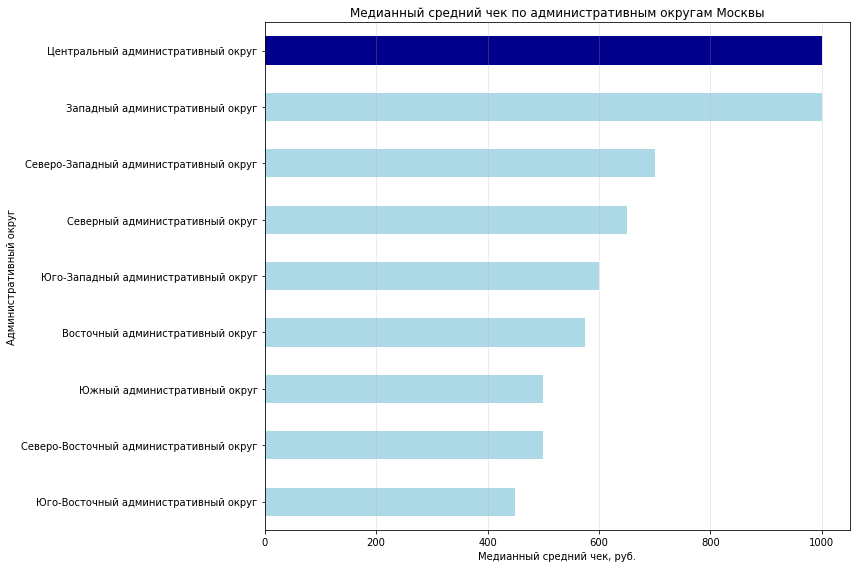

In [57]:
plt.figure(figsize=(12, 8))
district_median.plot(kind='barh',
                     color=['lightblue' if x != 'Центральный административный округ' else 'darkblue' for x in district_median.index])

plt.title('Медианный средний чек по административным округам Москвы')
plt.xlabel('Медианный средний чек, руб.')
plt.ylabel('Административный округ')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Анализ демонстрирует нелинейную зависимость цен от удаленности от центра. Особого внимания заслуживает тот факт, что Западный административный округ демонстрирует одинаковый с ЦАО уровень цен (1000 руб.), что свидетельствует о его сопоставимой престижности и покупательной способности населения. 

---


Однако общая картина может скрывать важные нюансы по отдельным категориям заведений. Давайте детально разберем, как именно удаленность от центра влияет на цены в разных сегментах.

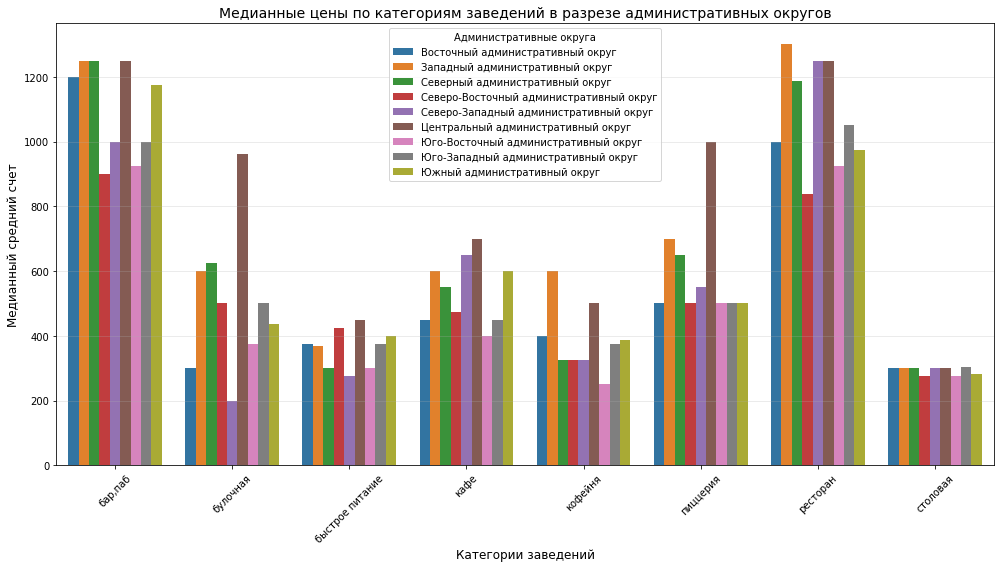

In [58]:
# Создаем новый датафрейм только с нужными столбцами
df_plot = df[['middle_avg_bill', 'category', 'district']].copy()

# Группируем данные для расчета медианных цен
median_prices = df_plot.groupby(['category', 'district'])['middle_avg_bill'].median().reset_index()

# Создаем столбчатую диаграмму медианных цен
plt.figure(figsize=(14, 8))
sns.barplot(data=median_prices, x='category', y='middle_avg_bill', hue='district', palette='tab10')

# Настраиваем внешний вид графика
plt.xlabel('Категории заведений', fontsize=12)
plt.ylabel('Медианный средний счет', fontsize=12)
plt.title('Медианные цены по категориям заведений в разрезе административных округов', fontsize=14)
plt.legend(title='Административные округа')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Детальный анализ по категориям заведений выявил интересную закономерность: влияние удаленности от центра на цены сильно варьируется в зависимости от типа заведения.

**Неожиданные ценовые аномалии:**

- В кофейнях и ресторанах Западный административный округ демонстрирует более высокие цены, чем Центральный
- В барах наблюдается единый ценовой уровень в ЦАО и ЗАО с последующим снижением в других округах

**Категории с выраженной географической зависимостью:**
- Булочные и пиццерии - классическая модель снижения цен от центра к периферии
- Заведения быстрого питания - умеренная зависимость от расположения

**Категории с минимальной географической зависимостью:**

- Столовые - демонстрируют практически единые цены по всей Москве, что свидетельствует об ориентации на массового потребителя с ограниченным бюджетом

---

### Промежуточный вывод

**На основе проведенного анализа можно выделить ключевые закономерности рынка общественного питания Москвы:**

- Рыночная структура: Доминируют кафе, рестораны и кофейни, тогда как столовые, булочные и заведения быстрого питания представлены слабо - это перспективные ниши с низкой конкуренцией.
- География бизнеса: Центральный АО лидирует среди округов, Юго-Восточный АО - наименее освоен. В ЦАО преобладают премиальные форматы (рестораны, бары).
- Сетевой потенциал: 60% рынка - несетевые заведения. Наиболее успешны для масштабирования кофейни и кафе (80% топ-15 сетей).
- Инвестиционные параметры: Для старта оптимальны булочные (50 мест), пиццерии (55) и кафе (60) с минимальными затратами на помещения.
- Ценовая стратегия: Выявлена сложная география цен - ЗАО конкурирует с ЦАО по уровню цен в кофейнях и ресторанах, столовые сохраняют единые цены по городу.

## 4. Итоговый вывод и рекомендации

Проведено комплексное исследование рынка общественного питания Москвы на основе данных сервисов Яндекс Карты и Яндекс Бизнес за лето 2022 года, включающее анализ 8,406 заведений из файла `/datasets/rest_info.csv` и информации о средних чеках 4,058 заведений из файла `/datasets/rest_price.csv`.

**Главные выводы:**

1. **Категории заведений и их распределение.** На рынке Москвы доминируют три основные категории: кафе (23,8%), рестораны (23,4%) и кофейни (16,6%), которые вместе составляют 63,8% рынка. Наименее представлены столовые (3,6%), булочные (3,0%) и заведения быстрого питания (6,8%), что указывает на потенциальные рыночные ниши для новых проектов.

2. **Географическое распределение.** Центральный административный округ концентрирует около 26% всех заведений. В ЦАО преобладают рестораны (30,1%), кафе (20,1%) и кофейни (19,3%), что подтверждает ориентацию на премиальный сегмент. При этом Северо-Западный административный округ демонстрирует наименьшее количество заведений, что может указывать на его недостаточную освоенность или меньшую популярность у предпринимателей.

3. **Сетевые vs несетевые заведения.** Несетевые заведения преобладают (60,7%), что демонстрирует высокую долю малого и среднего бизнеса в отрасли. Наиболее склонны к сетевой модели булочные, пиццерии и кофейни. Булочные имеют самую высокую долю сетевых заведений среди всех категорий.

4. **Вместимость заведений.** Наиболее типичное количество посадочных мест:
- Рестораны, бары, булочные: 85-90 мест
- Кофейни, столовые, заведения быстрого питания: 75-80 мест
- Кафе, пиццерии: 55-60 мест

**Для старта с минимальными инвестициями наиболее подходят пиццерии и кафе.**

5. **Рейтинги заведений.** Все категории получают высокие оценки (выше 4.0 баллов). Лидеры: бары, рестораны, кофейни. Разница между категориями незначительна (0.33 балла), поэтому выбор формата может основываться на других факторах.

6. **Факторы, влияющие на рейтинг.** Наибольшая корреляция обнаружена между рейтингом и ценовой категорией (0.26) - более дорогие заведения получают более высокие оценки. Количество посадочных мест не влияет на рейтинг.

7. **Топ-15 сетей:**
- `«Шоколадница»` - 120 заведений
- `«Доминос Пицца»` - 76 заведений
- `«Додо Пицца»` - 74 заведения

Среди топ-15 преобладают кофейни (5), кафе(4) и рестораны (3). Самые высокие рейтинги у «Кулинарная лавка братьев Караваевых» - 4.39 балла, «Буханка» - 4.40 балла, «Хинкальная» - 4.38 балла.

8. **Влияние локации на цены.** Западный административный округ (ЗАО) демонстрирует сопоставимый с ЦАО уровень цен (1000 руб.) Удаленность от центра напрямую влияет на цены:
- ЦАО м ЗАО: 1000 руб. (средний чек)
- Ближние округа: 575-700 руб.
- Удаленные округа: 450-500 руб.

**Рекомендации:**

Открытие кофейни премиум-класса в Западном административном округе.

**Почему это выгодно:**

1. Локация ЗАО
- Цены как в центре (средний чек 1000₽)
- Конкуренции в 3 раза меньше, чем в ЦАО
- Платежеспособная аудитория

2.  Формат - кафе/кофейня:

- Высокие цены на кофе в городе
- Проверенная бизнес-модель (4 из 15 топ-сетей - кофейни)
- Требует наименьших вложений

**Преимущества перед другими вариантами:**

- Меньше рисков, чем у ресторана
- Выше доходность, чем у булочной
- Быстрее окупаемость, чем у бара